# School Immunizations Project

# Data Mining Project

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 


In [2]:
# load dataset
train_data = pd.read_csv('2016-17-to-2018-19-immunizations.csv',encoding = "ISO-8859-1")
train_data.head()

SCHOOL_YEAR  SCHOOL_CODE    COUNTY  ...    CATEGORY COUNT PERCENT
0   2016-2017        52749  MONTEREY  ...         PBE   NaN     NaN
1   2016-2017        52749  MONTEREY  ...        HEPB   NaN     NaN
2   2016-2017        52749  MONTEREY  ...         DTP   NaN     NaN
3   2016-2017        52749  MONTEREY  ...       POLIO   NaN     NaN
4   2016-2017        52749  MONTEREY  ...  Up-To-Date   NaN     NaN

[5 rows x 11 columns]

In [3]:
mining_data=train_data.copy()

## 1. Preprocessing; finding duplicate values and missing values, filling missing values

In [4]:
# backup data for different types of filling of Nan values
train_data_backup1 = train_data
train_data_backup2 = train_data
train_data_backup3 = train_data
train_data_backup4 = train_data

### 1.2 Find Duplication of Data

In [ ]:
# find duplication in data
if (train_data.duplicated().any() == True):
    print(train_data.duplicated())
else:
    print("No duplicate data")

No duplicate data


### 1.3 Attributes & Observations

In [ ]:
# count of rows & columns
print("Count of records: ",len(train_data.axes[0]))
print("Count of attributes: ",len(train_data.axes[1]))

Count of records:  263071
Count of attributes:  11


### 1.4 Search for null values

In [ ]:
# checking null values
train_data.isnull().sum()

SCHOOL_YEAR            0
SCHOOL_CODE            0
COUNTY                 0
PUBLIC_PRIVATE         0
CITY                   0
SCHOOL_NAME            0
REPORTED               0
ENROLLMENT          9884
CATEGORY               0
COUNT             181137
PERCENT            55249
dtype: int64

### 1.5 Backward fill

In [ ]:
# backward fill
train_data_backup1 = train_data_backup1.fillna(method='bfill')
train_data_backup1.head()

SCHOOL_YEAR  SCHOOL_CODE    COUNTY  ...    CATEGORY COUNT PERCENT
0   2016-2017        52749  MONTEREY  ...         PBE   0.0     5.0
1   2016-2017        52749  MONTEREY  ...        HEPB   0.0     5.0
2   2016-2017        52749  MONTEREY  ...         DTP   0.0     5.0
3   2016-2017        52749  MONTEREY  ...       POLIO   0.0     5.0
4   2016-2017        52749  MONTEREY  ...  Up-To-Date   0.0     5.0

[5 rows x 11 columns]

In [ ]:
# search for missing values after backward fill
train_data_backup1.isnull().sum()

SCHOOL_YEAR         0
SCHOOL_CODE         0
COUNTY              0
PUBLIC_PRIVATE      0
CITY                0
SCHOOL_NAME         0
REPORTED            0
ENROLLMENT          0
CATEGORY            0
COUNT             180
PERCENT            80
dtype: int64

In [ ]:
# summary statistics after backward fill
train_data_backup1.describe()

SCHOOL_CODE     ENROLLMENT          COUNT        PERCENT
count  2.630710e+05  263071.000000  262891.000000  262991.000000
mean   5.444149e+06      69.328086      28.276765      49.563692
std    2.111153e+06      50.134537      44.375181      46.587390
min    5.274900e+04       1.000000       0.000000       0.000000
25%    6.015416e+06      26.000000       0.000000       2.000000
50%    6.045611e+06      68.000000       2.000000      62.000000
75%    6.133714e+06     101.000000      51.000000      98.000000
max    9.915507e+06    1117.000000     916.000000      99.000000

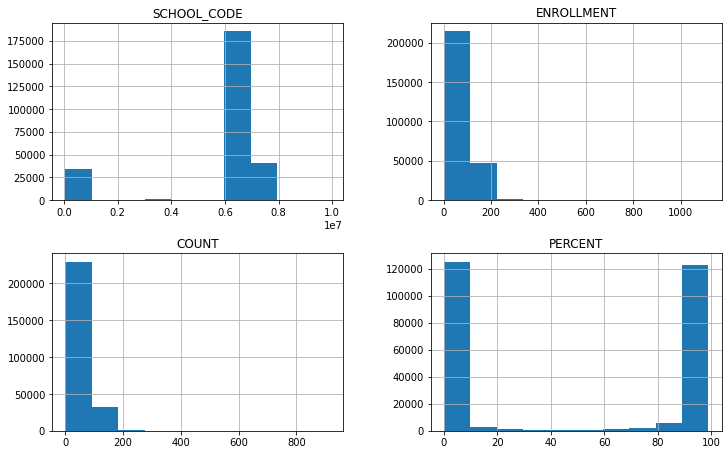

In [ ]:
# Let's us only plot the distributions of independent attributes
train_data_backup1.hist(figsize=(12,16),layout=(4,2));

In [ ]:
# Let's check the skewness values quantitatively
train_data_backup1.skew().sort_values(ascending=False)

ENROLLMENT     2.143527
COUNT          1.806079
PERCENT       -0.010958
SCHOOL_CODE   -2.004393
dtype: float64

Observations:
* Distribition of two columns show positive skewness (long right tail)
* The skewness values show agreement with our qualitative analysis of the distribution plot shown above
* Percent and school code show negative skewness

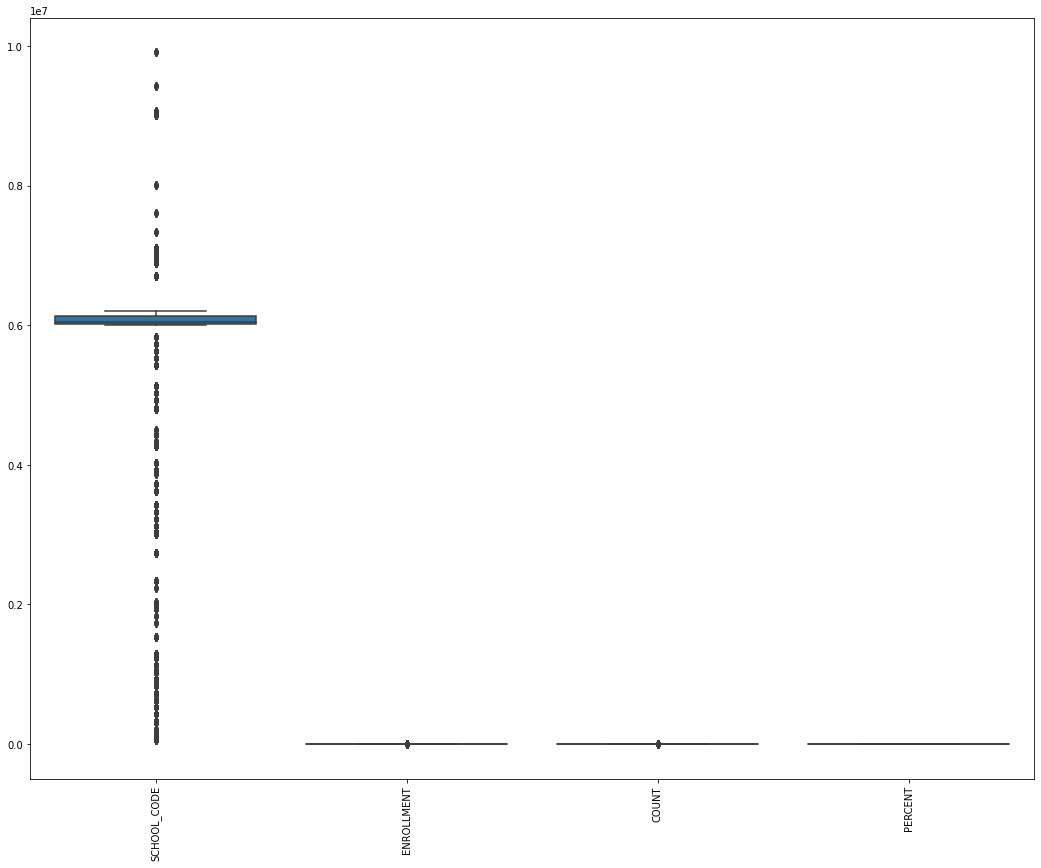

In [ ]:
# Let us check presence of outliers
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,14))
box = sns.boxplot(data=train_data_backup1)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

### 1.6 Forward fill

In [ ]:
# forward fill
train_data_backup2 = train_data_backup2.fillna(method='ffill')
train_data_backup2.head()

SCHOOL_YEAR  SCHOOL_CODE    COUNTY  ...    CATEGORY COUNT PERCENT
0   2016-2017        52749  MONTEREY  ...         PBE   NaN     NaN
1   2016-2017        52749  MONTEREY  ...        HEPB   NaN     NaN
2   2016-2017        52749  MONTEREY  ...         DTP   NaN     NaN
3   2016-2017        52749  MONTEREY  ...       POLIO   NaN     NaN
4   2016-2017        52749  MONTEREY  ...  Up-To-Date   NaN     NaN

[5 rows x 11 columns]

In [ ]:
# search for null values after forward fill
train_data_backup2.isnull().sum()

SCHOOL_YEAR        0
SCHOOL_CODE        0
COUNTY             0
PUBLIC_PRIVATE     0
CITY               0
SCHOOL_NAME        0
REPORTED           0
ENROLLMENT         0
CATEGORY           0
COUNT             22
PERCENT           11
dtype: int64

In [ ]:
# summary statistics after forward fill
train_data_backup2.describe()

SCHOOL_CODE     ENROLLMENT          COUNT        PERCENT
count  2.630710e+05  263071.000000  263049.000000  263060.000000
mean   5.444149e+06      69.361370      59.845721      62.890189
std    2.111153e+06      50.061081      49.383185      44.568666
min    5.274900e+04       1.000000       0.000000       0.000000
25%    6.015416e+06      26.000000      19.000000       2.000000
50%    6.045611e+06      68.000000      55.000000      95.000000
75%    6.133714e+06     101.000000      98.000000      98.000000
max    9.915507e+06    1117.000000     916.000000      99.000000

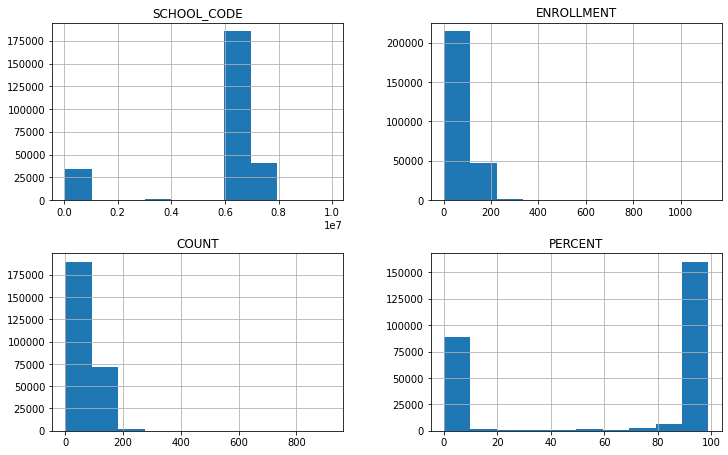

In [ ]:
# Let's us only plot the distributions of independent attributes
train_data_backup2.hist(figsize=(12,16),layout=(4,2));

In [ ]:
# Let's check the skewness values quantitatively
train_data_backup2.skew().sort_values(ascending=False)

ENROLLMENT     2.148879
COUNT          0.844292
PERCENT       -0.612066
SCHOOL_CODE   -2.004393
dtype: float64

Observations:
* Distribition of two columns show positive skewness (long right tail)
* The skewness values show agreement with our qualitative analysis of the distribution plot shown above
* Percent and school code show negative skewness

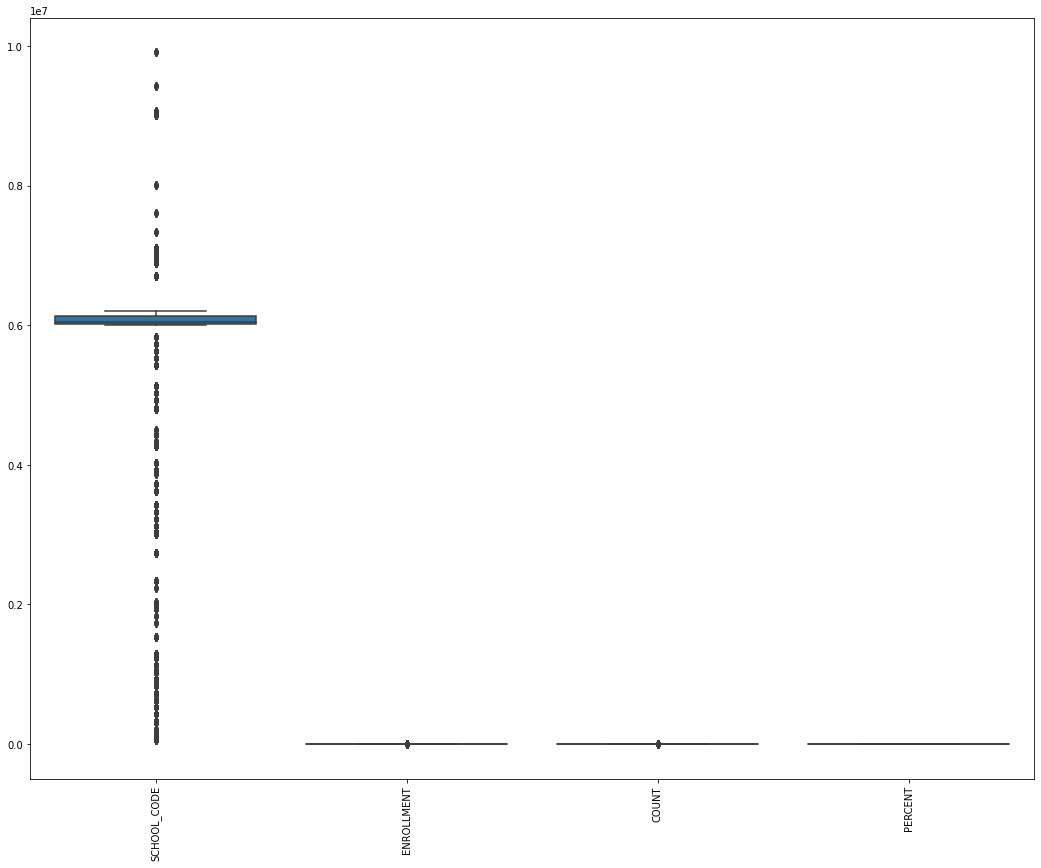

In [ ]:
# Let us check presence of outliers
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,14))
box = sns.boxplot(data=train_data_backup2)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

### 1.7 Mode fill

In [ ]:
# fill with mode
for c in train_data_backup3:
    if train_data_backup3[c].isnull().any():
        train_data_backup3[c] = train_data_backup3[c].fillna(train_data_backup3[c].mode()[0])
train_data_backup3.head()

SCHOOL_YEAR  SCHOOL_CODE    COUNTY PUBLIC_PRIVATE       CITY  \
0   2016-2017        52749  MONTEREY        PRIVATE  PRUNEDALE   
1   2016-2017        52749  MONTEREY        PRIVATE  PRUNEDALE   
2   2016-2017        52749  MONTEREY        PRIVATE  PRUNEDALE   
3   2016-2017        52749  MONTEREY        PRIVATE  PRUNEDALE   
4   2016-2017        52749  MONTEREY        PRIVATE  PRUNEDALE   

                   SCHOOL_NAME REPORTED  ENROLLMENT    CATEGORY  COUNT  \
0  PRUNEDALE CHRISTIAN ACADEMY        Y        10.0         PBE    0.0   
1  PRUNEDALE CHRISTIAN ACADEMY        Y        10.0        HEPB    0.0   
2  PRUNEDALE CHRISTIAN ACADEMY        Y        10.0         DTP    0.0   
3  PRUNEDALE CHRISTIAN ACADEMY        Y        10.0       POLIO    0.0   
4  PRUNEDALE CHRISTIAN ACADEMY        Y        10.0  Up-To-Date    0.0   

   PERCENT  
0     98.0  
1     98.0  
2     98.0  
3     98.0  
4     98.0

In [ ]:
# searching null values after mode filling
train_data_backup3.isnull().sum()

SCHOOL_YEAR       0
SCHOOL_CODE       0
COUNTY            0
PUBLIC_PRIVATE    0
CITY              0
SCHOOL_NAME       0
REPORTED          0
ENROLLMENT        0
CATEGORY          0
COUNT             0
PERCENT           0
dtype: int64

In [ ]:
# summary statistics after mode filling
train_data_backup3.describe()

SCHOOL_CODE     ENROLLMENT          COUNT        PERCENT
count  2.630710e+05  263071.000000  263071.000000  263071.000000
mean   5.444149e+06      68.288519      11.880135      63.886137
std    2.111153e+06      50.721101      33.267264      45.082133
min    5.274900e+04       1.000000       0.000000       0.000000
25%    6.015416e+06      24.000000       0.000000       2.000000
50%    6.045611e+06      67.000000       0.000000      96.000000
75%    6.133714e+06     100.000000       0.000000      98.000000
max    9.915507e+06    1117.000000     916.000000      99.000000

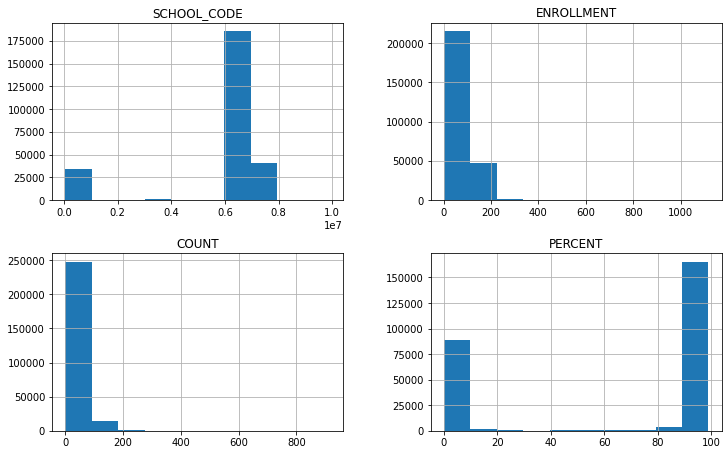

In [ ]:
# Let's us only plot the distributions of independent attributes
train_data_backup3.hist(figsize=(12,16),layout=(4,2));

In [ ]:
# Let's check the skewness values quantitatively
train_data_backup3.skew().sort_values(ascending=False)

COUNT          3.544271
ENROLLMENT     2.067567
PERCENT       -0.632639
SCHOOL_CODE   -2.004393
dtype: float64

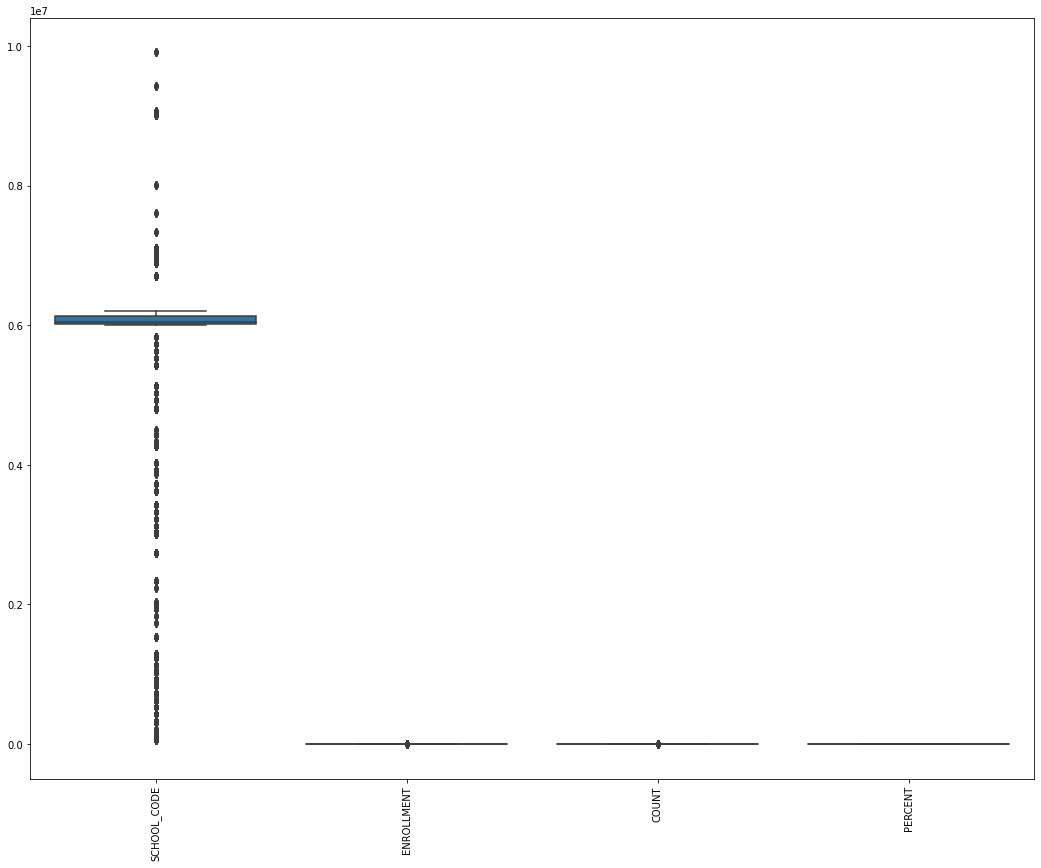

In [ ]:
# Let us check presence of outliers
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,14))
box = sns.boxplot(data=train_data_backup3)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

### 1.8 Mean + Mode Filling

In [5]:
# fill numerical data with mean and categorical data with mode
train_data_backup4['SCHOOL_CODE'].fillna(int(train_data_backup4['SCHOOL_CODE'].mean()), inplace=True)
train_data_backup4['ENROLLMENT'].fillna(int(train_data_backup4['ENROLLMENT'].mean()), inplace=True)
train_data_backup4['COUNT'].fillna(int(train_data_backup4['COUNT'].mean()), inplace=True)
train_data_backup4['PERCENT'].fillna(int(train_data_backup4['PERCENT'].mean()), inplace=True)
train_data_backup4['SCHOOL_YEAR'].fillna(train_data_backup4['SCHOOL_YEAR'].mode(), inplace=True)
train_data_backup4['COUNTY'].fillna(train_data_backup4['COUNTY'].mode(), inplace=True)
train_data_backup4['PUBLIC_PRIVATE'].fillna(train_data_backup4['PUBLIC_PRIVATE'].mode(), inplace=True)
train_data_backup4['CITY'].fillna(train_data_backup4['CITY'].mode(), inplace=True)
train_data_backup4['SCHOOL_NAME'].fillna(train_data_backup4['SCHOOL_NAME'].mode(), inplace=True)
train_data_backup4['REPORTED'].fillna(train_data_backup4['REPORTED'].mode(), inplace=True)
train_data_backup4['CATEGORY'].fillna(train_data_backup4['CATEGORY'].mode(), inplace=True)

train_data_backup4.head()

SCHOOL_YEAR  SCHOOL_CODE    COUNTY  ...    CATEGORY COUNT PERCENT
0   2016-2017        52749  MONTEREY  ...         PBE  38.0    54.0
1   2016-2017        52749  MONTEREY  ...        HEPB  38.0    54.0
2   2016-2017        52749  MONTEREY  ...         DTP  38.0    54.0
3   2016-2017        52749  MONTEREY  ...       POLIO  38.0    54.0
4   2016-2017        52749  MONTEREY  ...  Up-To-Date  38.0    54.0

[5 rows x 11 columns]

In [6]:
clusdata=train_data_backup4.copy()

In [ ]:
# searching null values after mean+mode filling
train_data_backup4.isnull().sum()

SCHOOL_YEAR       0
SCHOOL_CODE       0
COUNTY            0
PUBLIC_PRIVATE    0
CITY              0
SCHOOL_NAME       0
REPORTED          0
ENROLLMENT        0
CATEGORY          0
COUNT             0
PERCENT           0
dtype: int64

In [ ]:
# summary statistics
train_data_backup4.describe()

SCHOOL_CODE     ENROLLMENT          COUNT        PERCENT
count  2.630710e+05  263071.000000  263071.000000  263071.000000
mean   5.444149e+06      70.880960      38.044957      54.645453
std    2.111153e+06      48.947973      28.190278      41.510559
min    5.274900e+04       1.000000       0.000000       0.000000
25%    6.015416e+06      31.000000      38.000000       2.000000
50%    6.045611e+06      70.000000      38.000000      54.000000
75%    6.133714e+06     100.000000      38.000000      97.000000
max    9.915507e+06    1117.000000     916.000000      99.000000

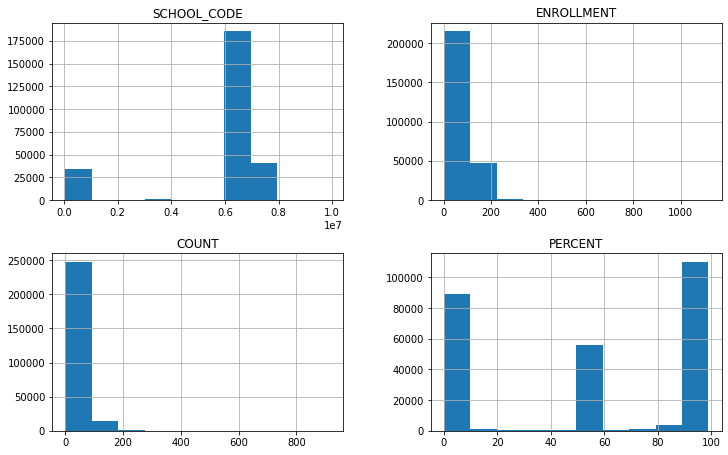

In [ ]:
# Let's us only plot the distributions of independent attributes
train_data_backup4.hist(figsize=(12,16),layout=(4,2));

In [ ]:
# Let's check the skewness values quantitatively
train_data_backup4.skew().sort_values(ascending=False)

COUNT          3.544271
ENROLLMENT     2.067567
PERCENT       -0.632639
SCHOOL_CODE   -2.004393
dtype: float64

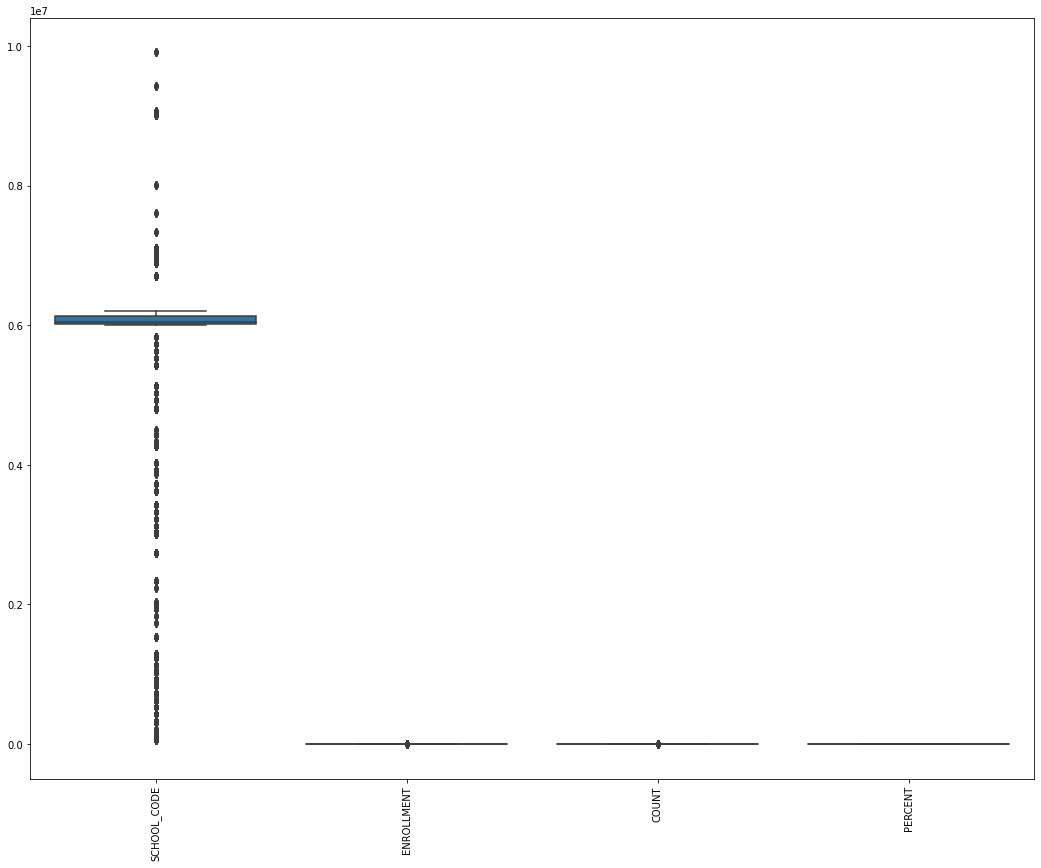

In [ ]:
# Let us check presence of outliers
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,14))
box = sns.boxplot(data=train_data_backup4)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

##### Comments 
As after backward and forward filling still have missing values, so mean filling(for numerical attributes) and mode(for categorical attributes) give best results in this case.

## 2. Summary statistics calculation & Visualizations

### 2.1 Information of data type

In [ ]:
train_data_backup4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263071 entries, 0 to 263070
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SCHOOL_YEAR     263071 non-null  object 
 1   SCHOOL_CODE     263071 non-null  int64  
 2   COUNTY          263071 non-null  object 
 3   PUBLIC_PRIVATE  263071 non-null  object 
 4   CITY            263071 non-null  object 
 5   SCHOOL_NAME     263071 non-null  object 
 6   REPORTED        263071 non-null  object 
 7   ENROLLMENT      263071 non-null  float64
 8   CATEGORY        263071 non-null  object 
 9   COUNT           263071 non-null  float64
 10  PERCENT         263071 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 22.1+ MB


# Normalize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

cccd_scaled = train_data_backup4.copy()
cccd_scaled.drop(['SCHOOL_YEAR','COUNTY','PUBLIC_PRIVATE','CITY','SCHOOL_NAME','REPORTED','CATEGORY'], axis=1, inplace=True)
cccd_scaled[:] = StandardScaler().fit_transform(cccd_scaled)

cols = list(cccd_scaled.columns)
cccd_scaled.head()

SCHOOL_CODE  ENROLLMENT     COUNT   PERCENT
0    -2.553775   -1.243792 -0.001595 -0.015549
1    -2.553775   -1.243792 -0.001595 -0.015549
2    -2.553775   -1.243792 -0.001595 -0.015549
3    -2.553775   -1.243792 -0.001595 -0.015549
4    -2.553775   -1.243792 -0.001595 -0.015549

### 2.2 Count of each attributes

In [ ]:
# count of each attributes' values
print("1. School Year: ", train_data_backup4['SCHOOL_YEAR'].value_counts())
print("2. School Code: ", train_data_backup4['SCHOOL_CODE'].value_counts())
print("3. Country: ", train_data_backup4['COUNTY'].value_counts())
print("4. School Sector: ", train_data_backup4['PUBLIC_PRIVATE'].value_counts())
print("5. City: ", train_data_backup4['CITY'].value_counts())
print("6. School Name: ", train_data_backup4['SCHOOL_NAME'].value_counts())
print("7. Conducted Immunization: ", train_data_backup4['REPORTED'].value_counts())
print("8. Enrollments: ", train_data_backup4['ENROLLMENT'].value_counts())
print("9. Types of Immunization: ", train_data_backup4['CATEGORY'].value_counts())
print("10. Enrolled Vaccinated: ", train_data_backup4['COUNT'].value_counts())
print("11. Percentage of Enrolled Vaccinated: ", train_data_backup4['PERCENT'].value_counts())



1. School Year:  2016-2017    90926
2017-2018    90145
2018-2019    82000
Name: SCHOOL_YEAR, dtype: int64
2. School Code:  6018949    32
6114292    32
6053847    32
7090137    32
7082019    32
           ..
6913800    10
6936728    10
6154645    10
7080799    10
137323     10
Name: SCHOOL_CODE, Length: 8863, dtype: int64
3. Country:  LOS ANGELES        64043
SAN DIEGO          19864
ORANGE             19420
SAN BERNARDINO     13737
RIVERSIDE          12693
SANTA CLARA        12443
ALAMEDA            10669
SACRAMENTO          9870
FRESNO              7294
CONTRA COSTA        7231
VENTURA             6126
KERN                6122
SAN JOAQUIN         5911
SAN MATEO           5246
SAN FRANCISCO       4779
STANISLAUS          4267
SONOMA              4172
TULARE              3980
SANTA BARBARA       3315
MONTEREY            3072
PLACER              3008
SOLANO              2625
MARIN               2316
SHASTA              2114
SANTA CRUZ          2089
MERCED              2070
SAN LUIS OBISP

### 2.3 Plots of attributes

# Histograms

In [ ]:
features = list(train_data.columns)
cat_attrs = [ col for col in features if train_data[col].dtype=='O' ]
cat_attrs

['SCHOOL_YEAR',
 'COUNTY',
 'PUBLIC_PRIVATE',
 'CITY',
 'SCHOOL_NAME',
 'REPORTED',
 'CATEGORY']

c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  
c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0

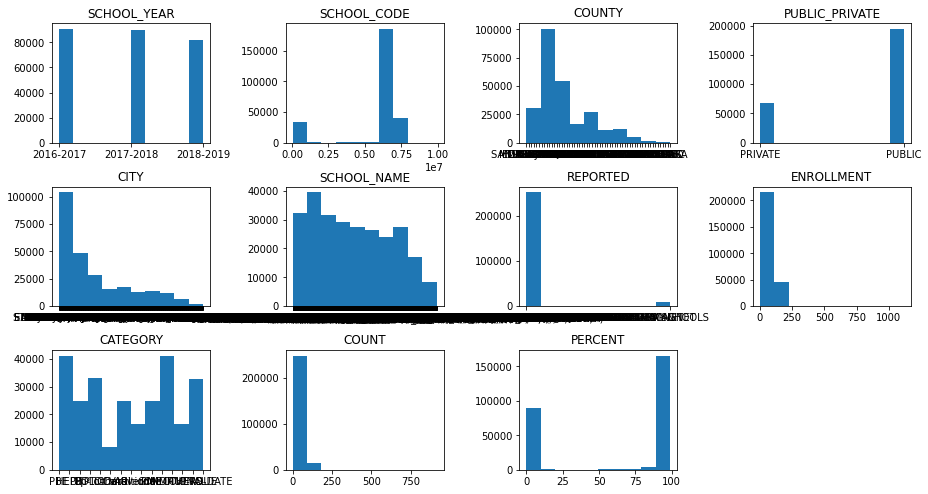

In [ ]:
plt.figure(figsize=(13, 9))
for k in range(len(features)):
    plt.subplot(4, 4, k+1)
    plt.hist(train_data[features[k]])
    plt.title(features[k], fontsize=12)
    plt.tight_layout()

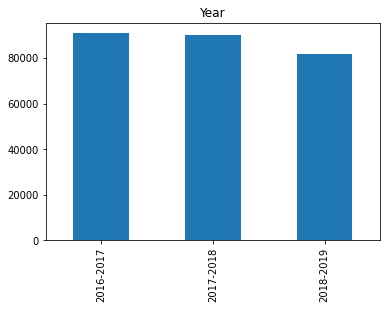

In [ ]:
# years in dataset
train_data_backup4['SCHOOL_YEAR'].value_counts().plot(kind='bar', title='Year')

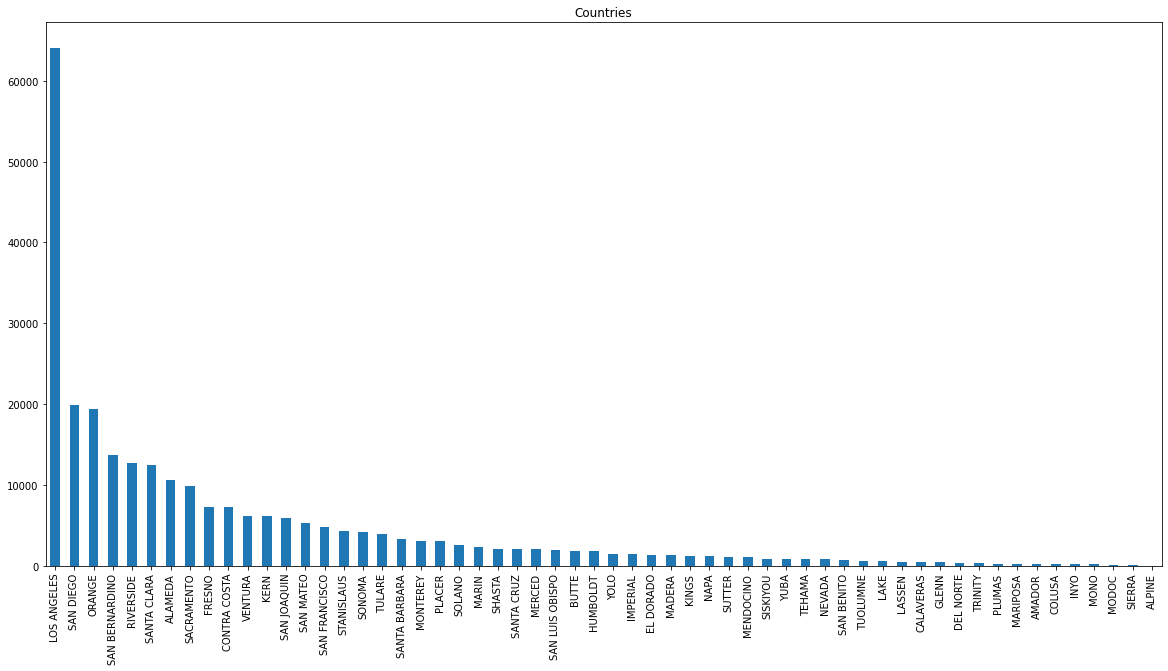

In [ ]:
train_data_backup4['COUNTY'].value_counts().plot(kind='bar',figsize=(20,10), title='Countries')

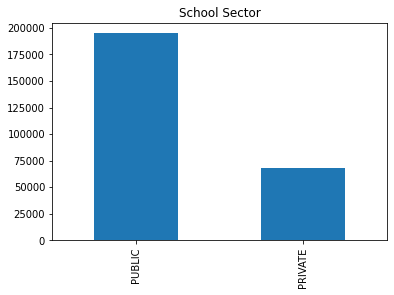

In [ ]:
#ax = train_data_backup4.plot.bar()
train_data_backup4['PUBLIC_PRIVATE'].value_counts().plot(kind='bar', title='School Sector')

<AxesSubplot:title={'center':'Reported Immunization Report'}>

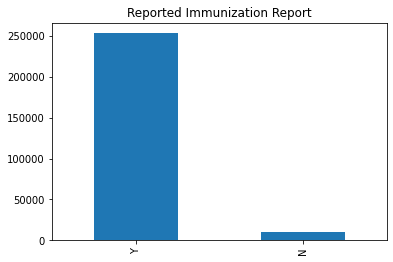

In [ ]:
train_data_backup4['REPORTED'].value_counts().plot(kind='bar', title='Reported Immunization Report')

<AxesSubplot:title={'center':'Types of Immunization'}>

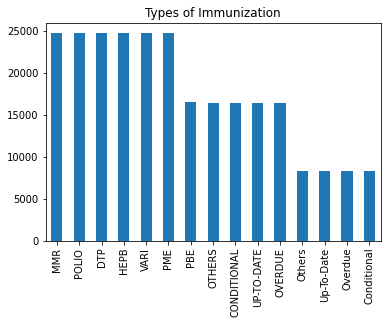

In [ ]:
train_data_backup4['CATEGORY'].value_counts().plot(kind='bar', title='Types of Immunization')

###### Comments
<ol>
<li>Three tenures are considered for this dataset: 2016-2017, 2017-2018, 2018-2019. in which 2016-2017 period has more count.</li>
<li>58 countries are included with different cities in them. Los Angeles has highest count.</li>
<li>In those cities, public & private sectors are targeted such as count of Public Sectors > Private Sectors.</li>
<li>Ratio of positive conducted immunization is greater.</li>
<li>PME, DTP, HEPB, MMR VARI, POLIO vaccinations have highest ratio as compared to other vaccinations.</li>
<li>Highest number and percentage of the students who got vaccinated are 209589 and 98 percent respectively.</li>
</ol>


## 3. Correlation & Covariance

### 3.1 Correlation of numerical attributes

In [ ]:
# correlation of numeric attributes
correlation = cccd_scaled.corr()
correlation

SCHOOL_CODE  ENROLLMENT     COUNT   PERCENT
SCHOOL_CODE     1.000000   -0.174739 -0.033046  0.006382
ENROLLMENT     -0.174739    1.000000  0.214451  0.006210
COUNT          -0.033046    0.214451  1.000000  0.510178
PERCENT         0.006382    0.006210  0.510178  1.000000

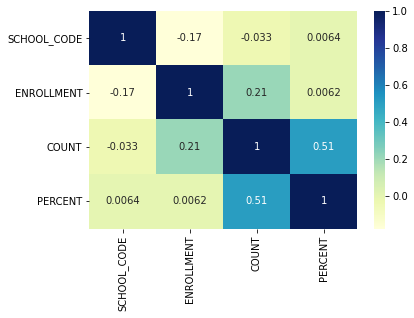

In [ ]:
# heatmap of correlation matrix
ax = sns.heatmap(correlation, annot=True, cmap="YlGnBu")

###### Comments
<ol>
<li>Correlation score of each school and total enrolled students who are vaccinated is 0.0524, so both have slight direct relation with each other.</li>
<li>Correlation score of total number of enrolled students and total number of enrooled vaccinated students is 0.33, so both have direct positive effect on each other.</li>
<li>Correlation score of total number of enrollees vaccinated and percentage of enrollees vaccinated is 0.22, so both have direct positive effect on each other.</li>
</ol>

### 3.2  Covariance of numerical attributes

In [ ]:
# covariance matrix of numeric attributes
covariance = cccd_scaled.cov()
covariance

SCHOOL_CODE  ENROLLMENT     COUNT   PERCENT
SCHOOL_CODE     1.000004   -0.174739 -0.033046  0.006382
ENROLLMENT     -0.174739    1.000004  0.214452  0.006210
COUNT          -0.033046    0.214452  1.000004  0.510180
PERCENT         0.006382    0.006210  0.510180  1.000004

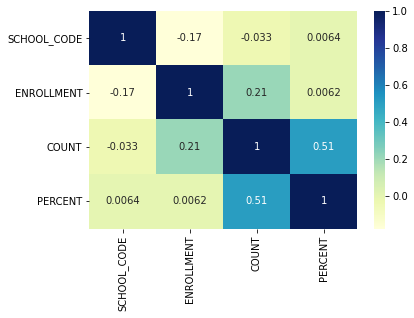

In [ ]:
# heatmap of covariance matrix
ax = sns.heatmap(covariance, annot=True, cmap="YlGnBu")


###### Comments
<ol>
<li>School, total number of enrollees, total number of enrollees vaccinated and percentage of enrollees vaccinated have high positive 
covariance among them and have larger contribution in dataset</li>


## 4.  Dependencies between categorical & numerical attributes

### 4.1 Converting categorical attributes into numerical attributes

In [ ]:
# converting categorical attributes into numerical attributes
encoding = LabelEncoder()
train_data_backup4['SCHOOL_YEAR'] = encoding.fit_transform(train_data_backup4['SCHOOL_YEAR'])
train_data_backup4['COUNTY'] = encoding.fit_transform(train_data_backup4['COUNTY'])
train_data_backup4['PUBLIC_PRIVATE'] = encoding.fit_transform(train_data_backup4['PUBLIC_PRIVATE'])
train_data_backup4['CITY'] = encoding.fit_transform(train_data_backup4['CITY'])
train_data_backup4['SCHOOL_NAME'] = encoding.fit_transform(train_data_backup4['SCHOOL_NAME'])
train_data_backup4['REPORTED'] = encoding.fit_transform(train_data_backup4['REPORTED'])
train_data_backup4['CATEGORY'] = encoding.fit_transform(train_data_backup4['CATEGORY'])
train_data_backup4

SCHOOL_YEAR  SCHOOL_CODE  COUNTY  ...  CATEGORY  COUNT  PERCENT
0                 0        52749      26  ...         9   38.0     54.0
1                 0        52749      26  ...         3   38.0     54.0
2                 0        52749      26  ...         2   38.0     54.0
3                 0        52749      26  ...        11   38.0     54.0
4                 0        52749      26  ...        13   38.0     54.0
...             ...          ...     ...  ...       ...    ...      ...
263066            2      9070187       6  ...         2   38.0     54.0
263067            2      9070187       6  ...        11   38.0     54.0
263068            2      9070187       6  ...         4   38.0     54.0
263069            2      9070187       6  ...         3   38.0     54.0
263070            2      9070187       6  ...        14   38.0     54.0

[263071 rows x 11 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

cccd_scaled1 = train_data_backup4.copy()
#cccd_scaled.drop(['SCHOOL_YEAR','COUNTY','PUBLIC_PRIVATE','CITY','SCHOOL_NAME','REPORTED','CATEGORY'], axis=1, inplace=True)
cccd_scaled1[:] = StandardScaler().fit_transform(cccd_scaled1)



In [ ]:
cols = list(cccd_scaled1.columns)
cccd_scaled1.head()

SCHOOL_YEAR  SCHOOL_CODE    COUNTY  ...  CATEGORY     COUNT   PERCENT
0    -1.192602    -2.553775 -0.121142  ...  0.450317 -0.001595 -0.015549
1    -1.192602    -2.553775 -0.121142  ... -0.922911 -0.001595 -0.015549
2    -1.192602    -2.553775 -0.121142  ... -1.151782 -0.001595 -0.015549
3    -1.192602    -2.553775 -0.121142  ...  0.908060 -0.001595 -0.015549
4    -1.192602    -2.553775 -0.121142  ...  1.365803 -0.001595 -0.015549

[5 rows x 11 columns]

### 4.2 Correlation of all attributes

In [ ]:
# correlation matrix of all attributes
correlation = cccd_scaled1.corr()
correlation

SCHOOL_YEAR  SCHOOL_CODE  ...     COUNT   PERCENT
SCHOOL_YEAR        1.000000    -0.007853  ...  0.021986  0.038454
SCHOOL_CODE       -0.007853     1.000000  ... -0.033046  0.006382
COUNTY            -0.000610    -0.009925  ... -0.011489 -0.001690
PUBLIC_PRIVATE     0.009813    -0.355456  ...  0.058463  0.009729
CITY              -0.003314    -0.011721  ... -0.011779  0.000630
SCHOOL_NAME        0.001325     0.056121  ... -0.005340 -0.000384
REPORTED           0.054553    -0.037451  ...  0.000315  0.003072
ENROLLMENT        -0.017290    -0.174739  ...  0.214451  0.006210
CATEGORY          -0.070498     0.000628  ...  0.064808  0.154642
COUNT              0.021986    -0.033046  ...  1.000000  0.510178
PERCENT            0.038454     0.006382  ...  0.510178  1.000000

[11 rows x 11 columns]

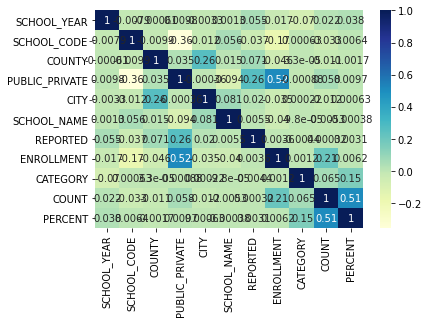

In [ ]:
# heatmap of correlation matrix
ax = sns.heatmap(correlation, annot=True, cmap="YlGnBu")

### 4.3 Covariance of all attributes

In [ ]:
# covariance matrix of all attributes
covariance = cccd_scaled1.cov()
covariance

SCHOOL_YEAR  SCHOOL_CODE  ...     COUNT   PERCENT
SCHOOL_YEAR        1.000004    -0.007853  ...  0.021986  0.038454
SCHOOL_CODE       -0.007853     1.000004  ... -0.033046  0.006382
COUNTY            -0.000610    -0.009925  ... -0.011489 -0.001690
PUBLIC_PRIVATE     0.009813    -0.355458  ...  0.058463  0.009729
CITY              -0.003314    -0.011721  ... -0.011779  0.000630
SCHOOL_NAME        0.001325     0.056121  ... -0.005340 -0.000384
REPORTED           0.054553    -0.037452  ...  0.000315  0.003072
ENROLLMENT        -0.017290    -0.174739  ...  0.214452  0.006210
CATEGORY          -0.070498     0.000628  ...  0.064809  0.154642
COUNT              0.021986    -0.033046  ...  1.000004  0.510180
PERCENT            0.038454     0.006382  ...  0.510180  1.000004

[11 rows x 11 columns]

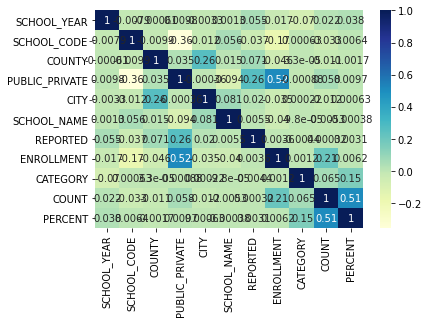

In [ ]:
# heatmap of covariance matrix
ax = sns.heatmap(covariance, annot=True, cmap="YlGnBu")

## 5. Relationship between different attributes

### 5.1 Graphs

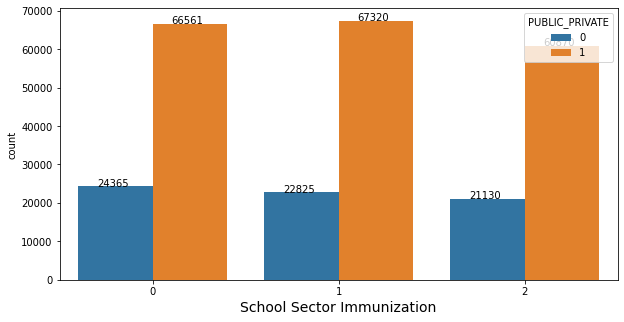

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ax = sns.countplot(x="SCHOOL_YEAR", hue="PUBLIC_PRIVATE", data=train_data)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xlabel('School Sector Immunization', fontsize=14)
plt.show()

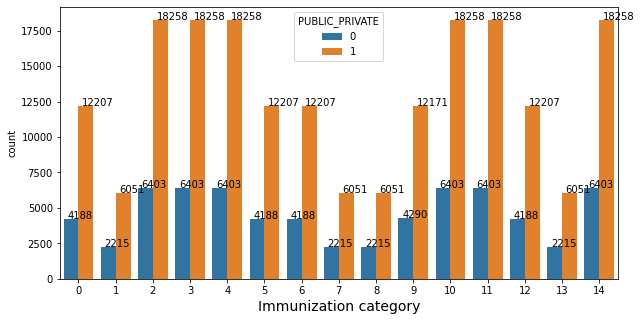

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="CATEGORY", hue="PUBLIC_PRIVATE", data=train_data)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xlabel('Immunization category', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="PERCENT", hue="PUBLIC_PRIVATE", data=train_data)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xlabel('Immunization category', fontsize=14)
plt.show()

### 5.2 Chi Square

In [ ]:
from scipy.stats import chi2_contingency

contigency_table = pd.crosstab(train_data_backup4['PUBLIC_PRIVATE'], train_data_backup4['CATEGORY'])
contigency_table


CATEGORY           0     1      2      3      4      5      6     7     8   \
PUBLIC_PRIVATE                                                               
0                4188  2215   6403   6403   6403   4188   4188  2215  2215   
1               12207  6051  18258  18258  18258  12207  12207  6051  6051   

CATEGORY           9      10     11     12    13     14  
PUBLIC_PRIVATE                                           
0                4290   6403   6403   4188  2215   6403  
1               12171  18258  18258  12207  6051  18258

<ol>
<li>Public sector has higher rate of immunization</li>
</ol>

In [ ]:
c, p_value, degree_of_freedom, expected = chi2_contingency(contigency_table)
print(p_value)


0.2066766402646732


<ol>
<li>As, null hypothesis is that "Public_Private Sector and Category of Immunization are independent"</li>
<li>p-value is 0.2066 which is greater than alpha(0.05) means that we accept the null hypothesis. So "Public_Private Sector and Category of Immunization are independent attributes."</li>
</ol>

In [ ]:
contigency_table = pd.crosstab(train_data_backup4['COUNT'], train_data_backup4['PERCENT'])
contigency_table
c, p_value, degree_of_freedom, expected = chi2_contingency(contigency_table)
print(p_value)

0.0


<ol>
<li>As, null hypothesis is that "Total num of Enrollees vaccinated and Percentage of Enrollees vaccinated are independent"</li>
<li>p-value is 0.00 which is lesser than alpha(0.05) means that we reject the null hypothesis. So Total num of Enrollees vaccinated and Percentage of Enrollees vaccinated are dependent attributes."</li>
</ol>

# DELIVERABLE - 2

## 1. Frequent Pattern Mining

In [ ]:
!pip install apyori
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from apyori import apriori
%matplotlib inline
import os

# Frequent Pattern mining by joining multiple attributes 

In [ ]:

train_data['combined'] = train_data.apply(lambda x: list([x['PUBLIC_PRIVATE'],
                                        x['CATEGORY'],x["SCHOOL_CODE"]  ]),axis=1)   
train_data.head()

SCHOOL_YEAR  SCHOOL_CODE    COUNTY PUBLIC_PRIVATE       CITY  \
0   2016-2017        52749  MONTEREY        PRIVATE  PRUNEDALE   
1   2016-2017        52749  MONTEREY        PRIVATE  PRUNEDALE   
2   2016-2017        52749  MONTEREY        PRIVATE  PRUNEDALE   
3   2016-2017        52749  MONTEREY        PRIVATE  PRUNEDALE   
4   2016-2017        52749  MONTEREY        PRIVATE  PRUNEDALE   

                   SCHOOL_NAME REPORTED  ENROLLMENT    CATEGORY  COUNT  \
0  PRUNEDALE CHRISTIAN ACADEMY        Y        10.0         PBE    NaN   
1  PRUNEDALE CHRISTIAN ACADEMY        Y        10.0        HEPB    NaN   
2  PRUNEDALE CHRISTIAN ACADEMY        Y        10.0         DTP    NaN   
3  PRUNEDALE CHRISTIAN ACADEMY        Y        10.0       POLIO    NaN   
4  PRUNEDALE CHRISTIAN ACADEMY        Y        10.0  Up-To-Date    NaN   

   PERCENT                      combined  
0      NaN         [PRIVATE, PBE, 52749]  
1      NaN        [PRIVATE, HEPB, 52749]  
2      NaN         [PRIVATE, DTP, 52749]  
3      NaN       [PRIVATE, POLIO, 52749]  
4      NaN  [PRIVATE, Up-To-Date, 52749]

In [ ]:
records=train_data['combined'].tolist()
print(records[:10])
print(len(records))

[['PRIVATE', 'PBE', 52749], ['PRIVATE', 'HEPB', 52749], ['PRIVATE', 'DTP', 52749], ['PRIVATE', 'POLIO', 52749], ['PRIVATE', 'Up-To-Date', 52749], ['PRIVATE', 'Others', 52749], ['PRIVATE', 'VARI', 52749], ['PRIVATE', 'Conditional', 52749], ['PRIVATE', 'Overdue', 52749], ['PRIVATE', 'PME', 52749]]
263071


In [ ]:
from efficient_apriori import apriori
t_itemsets, t_rules = apriori(records, min_support=0.001, min_confidence=0.4)
print(*t_rules, sep="\n")

{PME} -> {PUBLIC} (conf: 0.740, supp: 0.069, lift: 1.000, conv: 1.000)
{PBE} -> {PUBLIC} (conf: 0.739, supp: 0.046, lift: 0.999, conv: 0.996)
{Overdue} -> {PUBLIC} (conf: 0.732, supp: 0.023, lift: 0.989, conv: 0.969)
{Others} -> {PUBLIC} (conf: 0.732, supp: 0.023, lift: 0.989, conv: 0.969)
{Conditional} -> {PUBLIC} (conf: 0.732, supp: 0.023, lift: 0.989, conv: 0.969)
{VARI} -> {PUBLIC} (conf: 0.740, supp: 0.069, lift: 1.000, conv: 1.000)
{Up-To-Date} -> {PUBLIC} (conf: 0.732, supp: 0.023, lift: 0.989, conv: 0.969)
{POLIO} -> {PUBLIC} (conf: 0.740, supp: 0.069, lift: 1.000, conv: 1.000)
{MMR} -> {PUBLIC} (conf: 0.740, supp: 0.069, lift: 1.000, conv: 1.000)
{HEPB} -> {PUBLIC} (conf: 0.740, supp: 0.069, lift: 1.000, conv: 1.000)
{DTP} -> {PUBLIC} (conf: 0.740, supp: 0.069, lift: 1.000, conv: 1.000)
{CONDITIONAL} -> {PUBLIC} (conf: 0.745, supp: 0.046, lift: 1.006, conv: 1.017)
{OTHERS} -> {PUBLIC} (conf: 0.745, supp: 0.046, lift: 1.006, conv: 1.017)
{OVERDUE} -> {PUBLIC} (conf: 0.745, supp

After combining multiple attributes and then tedting for frequent patterns it was observed that most of the immunizations categories are frequent with the publi school and there was no frequent pattern with the private schools. It is observed that there is not much immnuization data for private school

# Schoolwise immunization

In [ ]:

sch_imm= train_data.groupby(['SCHOOL_CODE'])['CATEGORY'].apply(list).values.tolist()

c_itemsets, c_rules = apriori(sch_imm, min_support=0.75, min_confidence=0.99)
print(set(train_data['CATEGORY'].tolist()))

{'PBE', 'VARI', 'Conditional', 'UP-TO-DATE', 'Others', 'Overdue', 'Up-To-Date', 'CONDITIONAL', 'HEPB', 'PME', 'MMR', 'POLIO', 'OVERDUE', 'DTP', 'OTHERS'}


In [ ]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 4 and len(rule.rhs) == 1, c_rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule)

{CONDITIONAL, Conditional, HEPB, MMR} -> {DTP} (conf: 1.000, supp: 0.896, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, MMR} -> {HEPB} (conf: 1.000, supp: 0.896, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, HEPB} -> {MMR} (conf: 1.000, supp: 0.896, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, HEPB, OTHERS} -> {DTP} (conf: 1.000, supp: 0.896, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, OTHERS} -> {HEPB} (conf: 1.000, supp: 0.896, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, HEPB, OVERDUE} -> {DTP} (conf: 1.000, supp: 0.896, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, OVERDUE} -> {HEPB} (conf: 1.000, supp: 0.896, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, HEPB, Others} -> {DTP} (conf: 1.000, supp: 0.896, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, Others} -> {HEPB} (conf: 1.000, supp: 0.896, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, HEPB, Overdue} -> {DTP} (conf: 1.000, supp: 0.896, li

School immunization data was modified and merged and no each row contains all the immunizations covered by a specific school. It was obsereved with confidence 1 and support 0.89 that in any school if there is immunization of conditional ,HEPB and MMR then we can say with 100 percent confidence that DTP immunization will also be covered at that school. SImilarly if there is immunization of conditional , DTP and MMR then we can say with 100 percent confidence that HEPB immunization will also be covered at that school. There are hundereds of such rules and are shown above

# County-wise immunization Patterns

In [ ]:

sch_imm= train_data.groupby(['COUNTY'])['CATEGORY'].apply(list).values.tolist()

cn_itemsets, cn_rules = apriori(sch_imm, min_support=0.75, min_confidence=0.99)
print(set(train_data['CATEGORY'].tolist()))

{'PBE', 'VARI', 'Conditional', 'UP-TO-DATE', 'Others', 'Overdue', 'Up-To-Date', 'CONDITIONAL', 'HEPB', 'PME', 'MMR', 'POLIO', 'OVERDUE', 'DTP', 'OTHERS'}


In [ ]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 4 and len(rule.rhs) == 1, cn_rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule)

{Conditional, DTP, HEPB, MMR} -> {CONDITIONAL} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, DTP, HEPB, MMR} -> {Conditional} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, HEPB, MMR} -> {DTP} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, MMR} -> {HEPB} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, HEPB} -> {MMR} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{Conditional, DTP, HEPB, OTHERS} -> {CONDITIONAL} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, DTP, HEPB, OTHERS} -> {Conditional} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, HEPB, OTHERS} -> {DTP} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, OTHERS} -> {HEPB} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, HEPB} -> {OTHERS} (conf: 1.000, supp: 1.000, lift: 1.000

School immunization data was modified and merged and no each row contains all the immunizations covered by a specific county. It was obsereved with confidence 1 and support 1 that in any school if there is immunization of conditional ,HEPB and MMR then we can say with 100 percent confidence that DTP immunization will also be covered at that school. Similarly if there is immunization of conditional , DTP and MMR then we can say with 100 percent confidence that HEPB immunization will also be covered at that school. There are hundereds of such rules and are shown above

# City-wise immmunization patterns

In [ ]:

sch_imm= train_data.groupby(['CITY'])['CATEGORY'].apply(list).values.tolist()

ct_itemsets, ct_rules = apriori(sch_imm, min_support=1, min_confidence=0.99)


In [ ]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 5 and len(rule.rhs) == 1, cn_rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule)

{Conditional, DTP, HEPB, MMR, OTHERS} -> {CONDITIONAL} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, DTP, HEPB, MMR, OTHERS} -> {Conditional} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, HEPB, MMR, OTHERS} -> {DTP} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, MMR, OTHERS} -> {HEPB} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, HEPB, OTHERS} -> {MMR} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, DTP, HEPB, MMR} -> {OTHERS} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{Conditional, DTP, HEPB, MMR, OVERDUE} -> {CONDITIONAL} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, DTP, HEPB, MMR, OVERDUE} -> {Conditional} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional, HEPB, MMR, OVERDUE} -> {DTP} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{CONDITIONAL, Conditional

School immunization data was modified and merged and no each row contains all the immunizations covered by a specific city. It was obsereved with confidence 1 and support 1 that in any school if there is immunization of Conditional, HEPB, MMR, OTHERS then we can say with 100 percent confidence that DTP immunization will also be covered at that school. Similarly if there is immunization of Conditional, DTP, HEPB, MMR then we can say with 100 percent confidence that others immunization will also be covered at that school. There are hundereds of such rules and are shown above

## 2. Clustering

### K-Means Clustering

In [17]:
dataset=clusdata.iloc[:1000,[9,10]].values

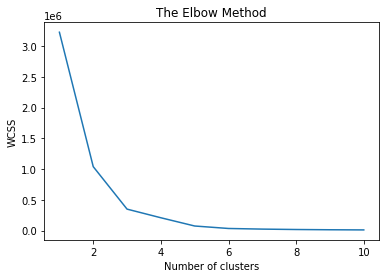

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset)

In [ ]:
from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_score(dataset, labels, metric='euclidean')

0.6848812222945874

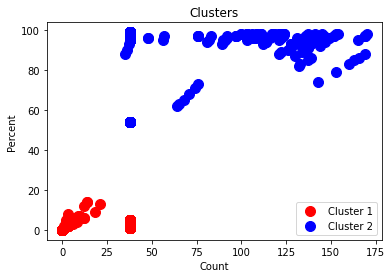

In [ ]:
# Visualising the clusters
plt.scatter(dataset[y_kmeans == 0, 0], dataset[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataset[y_kmeans == 1, 0], dataset[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters')
plt.xlabel('Count')
plt.ylabel('Percent')
plt.legend()
plt.show()

### Hierarchical Clustering

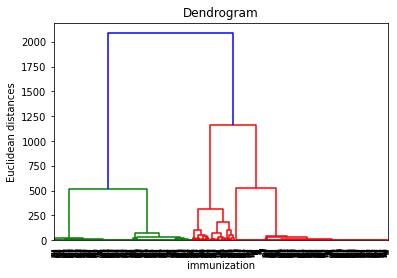

In [18]:

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('immunization')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset)

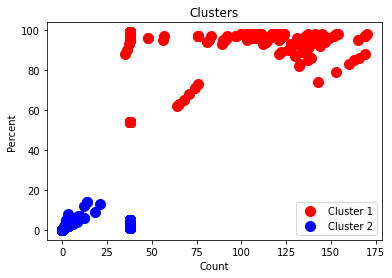

In [ ]:
# Visualising the clusters
plt.scatter(dataset[y_hc == 0, 0], dataset[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataset[y_hc == 1, 0], dataset[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters')
plt.xlabel('Count')
plt.ylabel('Percent')
plt.legend()
plt.show()

Lower the count of vaccinated students, lower is it's percentage and vice versa.

The attributes "Count of enrollees vaccinated and percentage of enrolless vaccinated" are directly proportional to each other. While most of the part of dataset is categorical in nature. When it is normalized into numerical dataset, attributes allign themselves in a way that it don't give useful clusters.